### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./charity_data.csv")
application_df.head()

C:\Users\Jason\anaconda3\envs\mlenv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jason\anaconda3\envs\mlenv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jason\anaconda3\envs\mlenv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jason\anaconda3\envs\mlenv\lib\site-package

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

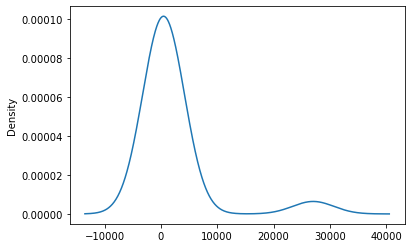

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_df["APPLICATION_TYPE"].value_counts().plot.density()

In [6]:
# Get value counts of application types
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts <500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2561        1
C1248        1
C1236        1
C3700        1
C6100        1
Name: CLASSIFICATION, Length: 71, dtype: int64

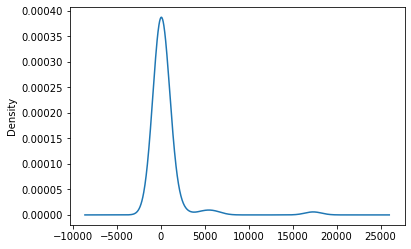

In [9]:
# Visualize the value counts of CLASSIFICATION
application_df["CLASSIFICATION"].value_counts().plot.density()
# application_df["CLASSIFICATION"].value_counts().plot.density(figsize=(8,6), fontsize=12,xlim=(0, 20000), linewidth=4)
# trying other parameters for fun

In [10]:
# Get value counts of classification types
classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2561        1
C1248        1
C1236        1
C3700        1
C6100        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts <1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
app_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
good_df = application_df.merge(encode_df, left_index=True, right_index=True)
good_df = good_df.drop(columns=["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE", "ORGANIZATION",\
                                "INCOME_AMT", "SPECIAL_CONSIDERATIONS"])
good_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Check all column values
good_df.columns.tolist()

['STATUS',
 'ASK_AMT',
 'IS_SUCCESSFUL',
 'APPLICATION_TYPE_Other',
 'APPLICATION_TYPE_T10',
 'APPLICATION_TYPE_T19',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'APPLICATION_TYPE_T7',
 'APPLICATION_TYPE_T8',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'ORGANIZATION_Association',
 'ORGANIZATION_Co-operative',
 'ORGANIZATION_Corporation',
 'ORGANIZATION_Trust',
 'INCOME_AMT_0',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_10000-24999',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_10M-50M',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_50M+',
 'INCOME_

In [16]:
# Split our preprocessed data into our features and target arrays
y = good_df["IS_SUCCESSFUL"].values
X = good_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Deliverable 3 improve the accuracy of the model to 75%+

### First attempt using different activation function

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden11 = 80
hidden21 = 30

nn1= tf.keras.models.Sequential()

# First hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden11, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden21, activation="tanh"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the new model
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Create callback that saves every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [21]:
# Train the model
fit_model1 = nn1.fit(X_train_scaled, y_train, epochs=200, callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5729 - accuracy: 0.7181
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5570 - accuracy: 0.7289
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7302
Epoch 4/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5503 - accuracy: 0.7324
Epoch 5/200
781/804 [============================>.] - ETA: 0s - loss: 0.5494 - accuracy: 0.7318
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7317
Epoch 6/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5476 - accuracy: 0.7317
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5470 - accuracy: 0.7318
Epoch 8/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5457 - accuracy: 0.7320
Epoch 9/200
804/804 [=============================

804/804 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7399
Epoch 65/200
542/804 [===================>..........] - ETA: 0s - loss: 0.5283 - accuracy: 0.7455
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5335 - accuracy: 0.7402
Epoch 66/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5335 - accuracy: 0.7397
Epoch 67/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7408
Epoch 68/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5334 - accuracy: 0.7406
Epoch 69/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5334 - accuracy: 0.7399
Epoch 70/200
506/804 [=================>............] - ETA: 0s - loss: 0.5331 - accuracy: 0.7399
Epoch 00070: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7401
Epoch 71/200
80

804/804 [==============================] - 1s 2ms/step - loss: 0.5307 - accuracy: 0.7417
Epoch 127/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5307 - accuracy: 0.7412
Epoch 128/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5310 - accuracy: 0.7406
Epoch 129/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5307 - accuracy: 0.7413
Epoch 130/200
264/804 [========>.....................] - ETA: 0s - loss: 0.5331 - accuracy: 0.7409
Epoch 00130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5305 - accuracy: 0.7410
Epoch 131/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5305 - accuracy: 0.7409
Epoch 132/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5306 - accuracy: 0.7413
Epoch 133/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.7408
Epoch 134/200
804/804 [========================

804/804 [==============================] - 1s 2ms/step - loss: 0.5296 - accuracy: 0.7414
Epoch 190/200
 34/804 [>.............................] - ETA: 1s - loss: 0.5257 - accuracy: 0.7408
Epoch 00190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5297 - accuracy: 0.7414
Epoch 191/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5295 - accuracy: 0.7420
Epoch 192/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5294 - accuracy: 0.7414
Epoch 193/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.7411
Epoch 194/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5291 - accuracy: 0.7415
Epoch 195/200
  1/804 [..............................] - ETA: 0s - loss: 0.5914 - accuracy: 0.6875
Epoch 00195: saving model to checkpoints\weights.195.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5294 - accuracy: 0.7412
Epoch 1

In [22]:
# Save and export model to hdf5 file
nn1.save("AlphabetSoupCharity_Optimization.h5")

In [23]:
# Evaluate the new model using the test data
model_loss1, model_accuracy1 = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss1}, Accuracy: {model_accuracy1}")

268/268 - 0s - loss: 0.5634 - accuracy: 0.7292
Loss: 0.5634199976921082, Accuracy: 0.7292128205299377


## Attempt 2 drop some additional columns and rerun original model

In [24]:
good_df1 = good_df.copy()

In [25]:
good_df1 = good_df1.drop(columns=['AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',\
                                  'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',\
                                  'AFFILIATION_Regional',])
good_df1.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Split our preprocessed data into our features and target arrays for new DF
y1 = good_df1["IS_SUCCESSFUL"].values
X1 = good_df1.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=1, stratify=y)

In [27]:
# Fit the StandardScaler to new training/test data
X_scaler1 = scaler.fit(X_train1)

# Scale the data
X_train_scaled1 = X_scaler1.transform(X_train1)
X_test_scaled1 = X_scaler1.transform(X_test1)

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled1[0])
hidden12 = 80
hidden22 = 30

nn2= tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden12, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden22, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3040      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,501
Trainable params: 5,501
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the new model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# New checkpoint

os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights2.{epoch:02d}.hdf5"

cp_callback2 = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [31]:
# Fit the model
fit_model2 = nn2.fit(X_train_scaled1, y_train1, epochs=200, callbacks=[cp_callback2])

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.6254 - accuracy: 0.6426
Epoch 2/200
804/804 [==============================] - 1s 2ms/step - loss: 0.6143 - accuracy: 0.6515
Epoch 3/200
804/804 [==============================] - 1s 2ms/step - loss: 0.6108 - accuracy: 0.6527
Epoch 4/200
804/804 [==============================] - 1s 2ms/step - loss: 0.6105 - accuracy: 0.6558
Epoch 5/200
756/804 [===========================>..] - ETA: 0s - loss: 0.6093 - accuracy: 0.6543
Epoch 00005: saving model to checkpoints\weights2.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6090 - accuracy: 0.6555
Epoch 6/200
804/804 [==============================] - 1s 2ms/step - loss: 0.6090 - accuracy: 0.6540
Epoch 7/200
804/804 [==============================] - 1s 2ms/step - loss: 0.6076 - accuracy: 0.6570
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.6075 - accuracy: 0.6561
Epoch 9/200
804/804 [============================

804/804 [==============================] - 1s 2ms/step - loss: 0.5992 - accuracy: 0.6614
Epoch 65/200
539/804 [===================>..........] - ETA: 0s - loss: 0.5995 - accuracy: 0.6595
Epoch 00065: saving model to checkpoints\weights2.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5995 - accuracy: 0.6608
Epoch 66/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5990 - accuracy: 0.6612
Epoch 67/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5991 - accuracy: 0.6614
Epoch 68/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5993 - accuracy: 0.6616
Epoch 69/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5992 - accuracy: 0.6617
Epoch 70/200
519/804 [==================>...........] - ETA: 0s - loss: 0.5991 - accuracy: 0.6616
Epoch 00070: saving model to checkpoints\weights2.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5989 - accuracy: 0.6619
Epoch 71/200


804/804 [==============================] - 2s 2ms/step - loss: 0.5972 - accuracy: 0.6627
Epoch 126/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5972 - accuracy: 0.6626
Epoch 127/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5969 - accuracy: 0.6630
Epoch 128/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5970 - accuracy: 0.6614
Epoch 129/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5969 - accuracy: 0.6627
Epoch 130/200
276/804 [=========>....................] - ETA: 0s - loss: 0.5979 - accuracy: 0.6619
Epoch 00130: saving model to checkpoints\weights2.130.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5970 - accuracy: 0.6624
Epoch 131/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5970 - accuracy: 0.6625
Epoch 132/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5968 - accuracy: 0.6627
Epoch 133/200
804/804 [=======================

804/804 [==============================] - 2s 2ms/step - loss: 0.5958 - accuracy: 0.6630
Epoch 188/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5962 - accuracy: 0.6636
Epoch 189/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5958 - accuracy: 0.6630
Epoch 190/200
 28/804 [>.............................] - ETA: 1s - loss: 0.5835 - accuracy: 0.6886
Epoch 00190: saving model to checkpoints\weights2.190.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5957 - accuracy: 0.6637
Epoch 191/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5961 - accuracy: 0.6628
Epoch 192/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5959 - accuracy: 0.6625
Epoch 193/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5962 - accuracy: 0.6640
Epoch 194/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5958 - accuracy: 0.6635
Epoch 195/200
 23/804 [.......................

In [32]:
# Save and export model to hdf5 file
nn2.save("AlphabetSoupCharity_Optimization.h5")

In [33]:
# Evaluate the new model using the test data
model_loss2, model_accuracy2 = nn2.evaluate(X_test_scaled1,y_test1,verbose=2)
print(f"Loss: {model_loss2}, Accuracy: {model_accuracy2}")

268/268 - 0s - loss: 0.6212 - accuracy: 0.6582
Loss: 0.6212191581726074, Accuracy: 0.6581923961639404


### Attempt 3: remove noisy variables, try more hidden layers, activation functions, more epochs and different optimizer

In [34]:
# Look for Noisy variables
good_df['AFFILIATION_Family/Parent'].value_counts()

0.0    34235
1.0       64
Name: AFFILIATION_Family/Parent, dtype: int64

In [35]:
good_df['AFFILIATION_National'].value_counts()

0.0    34266
1.0       33
Name: AFFILIATION_National, dtype: int64

In [36]:
good_df['AFFILIATION_Other'].value_counts()

0.0    34295
1.0        4
Name: AFFILIATION_Other, dtype: int64

In [37]:
good_df['AFFILIATION_Regional'].value_counts()

0.0    34286
1.0       13
Name: AFFILIATION_Regional, dtype: int64

In [38]:
good_df['USE_CASE_CommunityServ'].value_counts()

0.0    33915
1.0      384
Name: USE_CASE_CommunityServ, dtype: int64

In [39]:
good_df['USE_CASE_Other'].value_counts()

0.0    34296
1.0        3
Name: USE_CASE_Other, dtype: int64

In [40]:
good_df['USE_CASE_ProductDev'].value_counts()

0.0    28628
1.0     5671
Name: USE_CASE_ProductDev, dtype: int64

In [41]:
good_df['USE_CASE_Preservation'].value_counts()

1.0    28095
0.0     6204
Name: USE_CASE_Preservation, dtype: int64

In [42]:
good_df['INCOME_AMT_50M+'].value_counts()

0.0    34160
1.0      139
Name: INCOME_AMT_50M+, dtype: int64

In [43]:
good_df['INCOME_AMT_5M-10M'].value_counts()

0.0    34114
1.0      185
Name: INCOME_AMT_5M-10M, dtype: int64

In [44]:
good_df['INCOME_AMT_10M-50M'].value_counts()

0.0    34059
1.0      240
Name: INCOME_AMT_10M-50M, dtype: int64

In [45]:
good_df['INCOME_AMT_1M-5M'].value_counts()

0.0    33344
1.0      955
Name: INCOME_AMT_1M-5M, dtype: int64

In [46]:
good_df['ORGANIZATION_Trust'].value_counts()

1.0    23515
0.0    10784
Name: ORGANIZATION_Trust, dtype: int64

In [47]:
good_df['ORGANIZATION_Corporation'].value_counts()

0.0    34256
1.0       43
Name: ORGANIZATION_Corporation, dtype: int64

In [48]:

  'ORGANIZATION_Co-operative',
  'ORGANIZATION_Corporation',

('ORGANIZATION_Corporation',)

In [49]:
good_df['SPECIAL_CONSIDERATIONS_Y'].value_counts()

0.0    34272
1.0       27
Name: SPECIAL_CONSIDERATIONS_Y, dtype: int64

In [50]:
good_df['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [51]:
gooder_df = good_df.copy()
gooder_df = gooder_df.drop(columns=['USE_CASE_Heathcare', 'USE_CASE_Other', 'USE_CASE_Preservation',\
                                    'USE_CASE_ProductDev', 'AFFILIATION_Family/Parent', 'AFFILIATION_National',\
                                    'AFFILIATION_Other', 'AFFILIATION_Regional'])
gooder_df.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
# Split our preprocessed data into our features and target arrays for new DF
y2 = gooder_df["IS_SUCCESSFUL"].values
X2 = gooder_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1, stratify=y)

In [53]:
# Fit the StandardScaler to new training/test data
X_scaler2 = scaler.fit(X_train2)

# Scale the data
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [54]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled2[0])
hidden13 = 105
hidden23 = 60
hidden33 = 35
hidden43 = 20
hidden53 = 10

nn3= tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden13, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden23, activation="relu"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden33, activation="relu"))

# Fourth hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden43, activation="relu"))

# Fifth hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden53, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 105)               3780      
_________________________________________________________________
dense_7 (Dense)              (None, 60)                6360      
_________________________________________________________________
dense_8 (Dense)              (None, 35)                2135      
_________________________________________________________________
dense_9 (Dense)              (None, 20)                720       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 13,216
Trainable params: 13,216
Non-trainable params: 0
__________________________________________________

In [55]:
# Compile the new model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
# Fit the model
fit_model3 = nn3.fit(X_train_scaled2, y_train2, epochs=200, callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5702 - accuracy: 0.7200
Epoch 2/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5560 - accuracy: 0.7276
Epoch 3/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5537 - accuracy: 0.7300
Epoch 4/200
775/804 [===========================>..] - ETA: 0s - loss: 0.5522 - accuracy: 0.7321
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5521 - accuracy: 0.7320
Epoch 5/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5511 - accuracy: 0.7315
Epoch 6/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5500 - accuracy: 0.7322
Epoch 7/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5496 - accuracy: 0.7342
Epoch 8/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5488 - accuracy: 0.7326
Epoch 9/200
747/804 [==========================>..

534/804 [==================>...........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7413
Epoch 00064: saving model to checkpoints\weights.64.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5396 - accuracy: 0.7376
Epoch 65/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5392 - accuracy: 0.7379
Epoch 66/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5394 - accuracy: 0.7379
Epoch 67/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5390 - accuracy: 0.7376
Epoch 68/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5392 - accuracy: 0.7376
Epoch 69/200
518/804 [==================>...........] - ETA: 0s - loss: 0.5394 - accuracy: 0.7370
Epoch 00069: saving model to checkpoints\weights.69.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5393 - accuracy: 0.7376
Epoch 70/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5395 - accuracy: 0.7377
Epoch 71/200
80

804/804 [==============================] - 2s 2ms/step - loss: 0.5379 - accuracy: 0.7366
Epoch 127/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5379 - accuracy: 0.7374
Epoch 128/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5395 - accuracy: 0.7366
Epoch 129/200
271/804 [=========>....................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7369
Epoch 00129: saving model to checkpoints\weights.129.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5375 - accuracy: 0.7357
Epoch 130/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5385 - accuracy: 0.7369
Epoch 131/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5380 - accuracy: 0.7363
Epoch 132/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5380 - accuracy: 0.7365
Epoch 133/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5375 - accuracy: 0.7364
Epoch 134/200
247/804 [========>...............

804/804 [==============================] - 2s 2ms/step - loss: 0.5370 - accuracy: 0.7366
Epoch 189/200
 40/804 [>.............................] - ETA: 1s - loss: 0.5273 - accuracy: 0.7359
Epoch 00189: saving model to checkpoints\weights.189.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5371 - accuracy: 0.7358
Epoch 190/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5367 - accuracy: 0.7365
Epoch 191/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5368 - accuracy: 0.7367
Epoch 192/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5370 - accuracy: 0.7370
Epoch 193/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5365 - accuracy: 0.7372
Epoch 194/200
 22/804 [..............................] - ETA: 1s - loss: 0.5514 - accuracy: 0.7273
Epoch 00194: saving model to checkpoints\weights.194.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5371 - accuracy: 0.7368
Epoch 1

In [57]:
# Save and export model to hdf5 file
nn3.save("AlphabetSoupCharity_Optimization.h5")

In [58]:
# Evaluate the new model using the test data
model_loss3, model_accuracy3 = nn3.evaluate(X_test_scaled2,y_test2,verbose=2)
print(f"Loss: {model_loss3}, Accuracy: {model_accuracy3}")

268/268 - 0s - loss: 0.5959 - accuracy: 0.7242
Loss: 0.5958819389343262, Accuracy: 0.7241982221603394


## Attempt 4 (I know 3 are required but I want to get to 75%)

In [59]:
# Create a smaller DF
goodest_df = gooder_df.copy()
goodest_df = goodest_df.drop(columns=['ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation', 'SPECIAL_CONSIDERATIONS_N',\
                                      'SPECIAL_CONSIDERATIONS_Y'])

In [60]:
# Split our preprocessed data into our features and target arrays for new DF
y3 = goodest_df["IS_SUCCESSFUL"].values
X3 = goodest_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=1, stratify=y)

# Fit the StandardScaler to new training/test data
X_scaler3 = scaler.fit(X_train3)

# Scale the data
X_train_scaled3 = X_scaler3.transform(X_train3)
X_test_scaled3 = X_scaler3.transform(X_test3)

In [61]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled3[0])
hidden14 = 120
hidden24 = 60
hidden34 = 35
hidden44 = 24
hidden54 = 12
hidden64 = 6

nn4= tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden14, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden24, activation="relu"))

# Third hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden34, activation="relu"))

# Fourth hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden44, activation="relu"))

# Fifth hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden54, activation="relu"))

# Sixth hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden64, activation="relu"))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

# Compile the new model
nn4.compile(loss="binary_crossentropy", optimizer="adamax", metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 120)               3840      
_________________________________________________________________
dense_13 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_14 (Dense)             (None, 35)                2135      
_________________________________________________________________
dense_15 (Dense)             (None, 24)                864       
_________________________________________________________________
dense_16 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

In [62]:
# Fit the model
fit_model4 = nn4.fit(X_train_scaled3, y_train3, epochs=200, callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.6051 - accuracy: 0.7053
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5564 - accuracy: 0.7301
Epoch 3/200
790/804 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7307
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5537 - accuracy: 0.7307
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7318
Epoch 5/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5509 - accuracy: 0.7332
Epoch 6/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7327
Epoch 7/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5498 - accuracy: 0.7319
Epoch 8/200
756/804 [===========================>..] - ETA: 0s - loss: 0.5493 - accuracy: 0.7345
Epoch 00008: saving model to checkpoints\weights.08.hd

804/804 [==============================] - 2s 2ms/step - loss: 0.5412 - accuracy: 0.7382
Epoch 64/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5413 - accuracy: 0.7377
Epoch 65/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5412 - accuracy: 0.7369
Epoch 66/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5412 - accuracy: 0.7374
Epoch 67/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5411 - accuracy: 0.7371
Epoch 68/200
512/804 [==================>...........] - ETA: 0s - loss: 0.5444 - accuracy: 0.7332
Epoch 00068: saving model to checkpoints\weights.68.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5408 - accuracy: 0.7372
Epoch 69/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5411 - accuracy: 0.7369
Epoch 70/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5409 - accuracy: 0.7372
Epoch 71/200
804/804 [==============================] -

804/804 [==============================] - 2s 2ms/step - loss: 0.5390 - accuracy: 0.7386
Epoch 127/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5389 - accuracy: 0.7386
Epoch 128/200
282/804 [=========>....................] - ETA: 1s - loss: 0.5442 - accuracy: 0.7332
Epoch 00128: saving model to checkpoints\weights.128.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5393 - accuracy: 0.7379
Epoch 129/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5391 - accuracy: 0.7389
Epoch 130/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5390 - accuracy: 0.7382
Epoch 131/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5390 - accuracy: 0.7386
Epoch 132/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5390 - accuracy: 0.7383
Epoch 133/200
255/804 [========>.....................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7401
Epoch 00133: saving model to checkpoints\weights.13

 43/804 [>.............................] - ETA: 1s - loss: 0.5208 - accuracy: 0.7551
Epoch 00188: saving model to checkpoints\weights.188.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5378 - accuracy: 0.7386
Epoch 189/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5380 - accuracy: 0.7386
Epoch 190/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5379 - accuracy: 0.7389
Epoch 191/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5378 - accuracy: 0.7387
Epoch 192/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5376 - accuracy: 0.7394
Epoch 193/200
 24/804 [..............................] - ETA: 1s - loss: 0.5317 - accuracy: 0.7266
Epoch 00193: saving model to checkpoints\weights.193.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5376 - accuracy: 0.7388
Epoch 194/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5379 - accuracy: 0.7384
Epoch 1

In [63]:
# Save and export model to hdf5 file
nn4.save("AlphabetSoupCharity_Optimization.h5")

In [64]:
# Evaluate the new model using the test data
model_loss4, model_accuracy4 = nn4.evaluate(X_test_scaled3,y_test3,verbose=2)
print(f"Loss: {model_loss4}, Accuracy: {model_accuracy4}")

268/268 - 0s - loss: 0.5609 - accuracy: 0.7287
Loss: 0.5608557462692261, Accuracy: 0.7287463545799255


## Attempt 5 using adamax activation function instead of adam, adjusting columns, adjusting ask_amt

In [65]:
# Create a smaller DF
best_df = good_df.copy()
best_df = best_df.drop(columns=['ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation', 'SPECIAL_CONSIDERATIONS_N','STATUS',\
                                'SPECIAL_CONSIDERATIONS_Y', 'USE_CASE_Other', 'AFFILIATION_Family/Parent','USE_CASE_CommunityServ',\
                                'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional'])
best_df

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
#Check ask amount values put it into a df first
blist = best_df[["ASK_AMT"]]

In [67]:
# Check low values
blist[blist.ASK_AMT > 10000]

,ASK_AMT
1,108590
4,142590
6,31452
7,7508025
8,94389
...,...
34280,401661
34281,56261
34284,3384856
34289,20197


In [68]:
# get indexes for rows with ASK_AMT greater than 115m
blist[blist.ASK_AMT > 101000000].index

Int64Index([  676,   677,   773,   871,   941,  2328,  3065,  5319, 10298,
            11126, 11822, 11824, 11943, 12343, 12344, 12346, 13909, 20103,
            21157, 21161, 21186, 21482, 21558, 21633, 21634, 21640, 21641,
            21646, 21697, 21861, 21884, 22494, 22994, 23079, 23893, 23905,
            24101, 24139, 24145, 24795, 24796, 24799, 24800, 24805, 24947,
            24955, 25509, 25553, 25563, 25693, 25794, 25848, 26047, 26098,
            26372, 26430, 27607, 28083, 29078, 29180, 29372, 29477, 29488,
            29489, 30099, 30119, 30121, 31337, 31343, 31529, 31534, 31618,
            32095, 32384, 32385, 32552, 32558, 32635, 32944, 33027, 33030,
            33033, 33040, 33162, 33175, 33256, 33359, 33375, 33678, 33695,
            33717, 33718, 33720, 33760, 33810, 34034, 34187, 34222, 34223,
            34237],
           dtype='int64')

In [69]:
indices = [676,   677,   773,   871,   941,  2328,  3065,  5319, 10298,
            11126, 11822, 11824, 11943, 12343, 12344, 12346, 13909, 20103,
            21157, 21161, 21186, 21482, 21558, 21633, 21634, 21640, 21641,
            21646, 21697, 21861, 21884, 22494, 22994, 23079, 23893, 23905,
            24101, 24139, 24145, 24795, 24796, 24799, 24800, 24805, 24947,
            24955, 25509, 25553, 25563, 25693, 25794, 25848, 26047, 26098,
            26372, 26430, 27607, 28083, 29078, 29180, 29372, 29477, 29488,
            29489, 30099, 30119, 30121, 31337, 31343, 31529, 31534, 31618,
            32095, 32384, 32385, 32552, 32558, 32635, 32944, 33027, 33030,
            33033, 33040, 33162, 33175, 33256, 33359, 33375, 33678, 33695,
            33717, 33718, 33720, 33760, 33810, 34034, 34187, 34222, 34223,
            34237]

In [70]:
# get mean of ask amt
best_df["ASK_AMT"].mean()

2769198.6820607013

In [71]:
# Reduce crazy outlier ask amounts and set to mean or most common value
new_best_df = best_df.copy()
new_best_df.loc[indices, "ASK_AMT"] = 2769198.6820607013
new_best_df

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,5000.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,5000.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,5000.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# Split our preprocessed data into our features and target arrays for new DF
y4 = new_best_df["IS_SUCCESSFUL"].values
X4 = new_best_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, random_state=1, stratify=y)

# Fit the StandardScaler to new training/test data
X_scaler4 = scaler.fit(X_train4)

# Scale the data
X_train_scaled4 = X_scaler4.transform(X_train4)
X_test_scaled4 = X_scaler4.transform(X_test4)

In [73]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled4[0])
hidden51 = 200
hidden52 = 120
hidden53 = 70
hidden54 = 40
hidden55 = 25
hidden56 = 15

nn5= tf.keras.models.Sequential()

# First hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden51, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden52, activation="relu"))

# Third hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden53, activation="relu"))

# Fourth hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden54, activation="relu"))

# Fifth hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden55, activation="relu"))

# Sixth hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden56, activation="relu"))

# Output layer
nn5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn5.summary()

# Compile the new model
nn5.compile(loss="binary_crossentropy", optimizer="adamax", metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 200)               6600      
_________________________________________________________________
dense_20 (Dense)             (None, 120)               24120     
_________________________________________________________________
dense_21 (Dense)             (None, 70)                8470      
_________________________________________________________________
dense_22 (Dense)             (None, 40)                2840      
_________________________________________________________________
dense_23 (Dense)             (None, 25)                1025      
_________________________________________________________________
dense_24 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                

In [74]:
# Fit the model
fit_model5 = nn5.fit(X_train_scaled4, y_train4, epochs=2000, callbacks=[cp_callback], verbose=1)

Epoch 1/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5651 - accuracy: 0.7227
Epoch 2/2000
795/804 [============================>.] - ETA: 0s - loss: 0.5517 - accuracy: 0.7306
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5516 - accuracy: 0.7306
Epoch 3/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5491 - accuracy: 0.7322
Epoch 4/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5472 - accuracy: 0.7332
Epoch 5/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5464 - accuracy: 0.7345
Epoch 6/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5458 - accuracy: 0.7348
Epoch 7/2000
770/804 [===========================>..] - ETA: 0s - loss: 0.5453 - accuracy: 0.7357
Epoch 00007: saving model to checkpoints\weights.07.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5454 - accuracy: 0.7352
Ep

804/804 [==============================] - 3s 3ms/step - loss: 0.5339 - accuracy: 0.7408
Epoch 63/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5335 - accuracy: 0.7401
Epoch 64/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5339 - accuracy: 0.7406
Epoch 65/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5334 - accuracy: 0.7414
Epoch 66/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5330 - accuracy: 0.7407
Epoch 67/2000
534/804 [==================>...........] - ETA: 0s - loss: 0.5323 - accuracy: 0.7417
Epoch 00067: saving model to checkpoints\weights.67.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5333 - accuracy: 0.7412
Epoch 68/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5329 - accuracy: 0.7406
Epoch 69/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5327 - accuracy: 0.7414
Epoch 70/2000
804/804 [=========================

804/804 [==============================] - 2s 3ms/step - loss: 0.5289 - accuracy: 0.7427
Epoch 125/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5287 - accuracy: 0.7423
Epoch 126/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5289 - accuracy: 0.7420
Epoch 127/2000
287/804 [=========>....................] - ETA: 1s - loss: 0.5222 - accuracy: 0.7495
Epoch 00127: saving model to checkpoints\weights.127.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5286 - accuracy: 0.7432
Epoch 128/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5289 - accuracy: 0.7434
Epoch 129/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5287 - accuracy: 0.7425
Epoch 130/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5288 - accuracy: 0.7434
Epoch 131/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5287 - accuracy: 0.7432
Epoch 132/2000
275/804 [=========>......

804/804 [==============================] - 2s 3ms/step - loss: 0.5260 - accuracy: 0.7432
Epoch 187/2000
 48/804 [>.............................] - ETA: 2s - loss: 0.5102 - accuracy: 0.7630
Epoch 00187: saving model to checkpoints\weights.187.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5260 - accuracy: 0.7445
Epoch 188/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5258 - accuracy: 0.7446
Epoch 189/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5260 - accuracy: 0.7437
Epoch 190/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5258 - accuracy: 0.7448
Epoch 191/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5258 - accuracy: 0.7447
Epoch 192/2000
 17/804 [..............................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7482
Epoch 00192: saving model to checkpoints\weights.192.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5259 - accuracy: 0.7447
E

804/804 [==============================] - 2s 3ms/step - loss: 0.5236 - accuracy: 0.7451
Epoch 248/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5235 - accuracy: 0.7451
Epoch 249/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5235 - accuracy: 0.7453
Epoch 250/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5236 - accuracy: 0.7452
Epoch 251/2000
591/804 [=====================>........] - ETA: 0s - loss: 0.5216 - accuracy: 0.7466
Epoch 00251: saving model to checkpoints\weights.251.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5234 - accuracy: 0.7454
Epoch 252/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5237 - accuracy: 0.7449
Epoch 253/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5235 - accuracy: 0.7453
Epoch 254/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5235 - accuracy: 0.7452
Epoch 255/2000
804/804 [================

804/804 [==============================] - 2s 3ms/step - loss: 0.5213 - accuracy: 0.7461
Epoch 310/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5216 - accuracy: 0.7462
Epoch 311/2000
356/804 [============>.................] - ETA: 1s - loss: 0.5166 - accuracy: 0.7480
Epoch 00311: saving model to checkpoints\weights.311.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5216 - accuracy: 0.7461
Epoch 312/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5212 - accuracy: 0.7459
Epoch 313/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5214 - accuracy: 0.7458
Epoch 314/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5213 - accuracy: 0.7459
Epoch 315/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5210 - accuracy: 0.7455
Epoch 316/2000
330/804 [===========>..................] - ETA: 1s - loss: 0.5235 - accuracy: 0.7466
Epoch 00316: saving model to checkpoints\wei

109/804 [===>..........................] - ETA: 2s - loss: 0.5097 - accuracy: 0.7511
Epoch 00371: saving model to checkpoints\weights.371.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5192 - accuracy: 0.7466
Epoch 372/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5195 - accuracy: 0.7464
Epoch 373/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5194 - accuracy: 0.7462
Epoch 374/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5189 - accuracy: 0.7468
Epoch 375/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5195 - accuracy: 0.7465
Epoch 376/2000
 92/804 [==>...........................] - ETA: 2s - loss: 0.5259 - accuracy: 0.7476
Epoch 00376: saving model to checkpoints\weights.376.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5189 - accuracy: 0.7477
Epoch 377/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5197 - accuracy: 0.7466
E

804/804 [==============================] - 2s 3ms/step - loss: 0.5174 - accuracy: 0.7476
Epoch 432/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5174 - accuracy: 0.7475
Epoch 433/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7474
Epoch 434/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5173 - accuracy: 0.7480
Epoch 435/2000
656/804 [=======================>......] - ETA: 0s - loss: 0.5167 - accuracy: 0.7489
Epoch 00435: saving model to checkpoints\weights.435.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5168 - accuracy: 0.7489
Epoch 436/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5179 - accuracy: 0.7476
Epoch 437/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5167 - accuracy: 0.7488
Epoch 438/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7479
Epoch 439/2000
804/804 [================

804/804 [==============================] - 2s 3ms/step - loss: 0.5166 - accuracy: 0.7488
Epoch 494/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5157 - accuracy: 0.7484
Epoch 495/2000
414/804 [==============>...............] - ETA: 1s - loss: 0.5201 - accuracy: 0.7452
Epoch 00495: saving model to checkpoints\weights.495.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5160 - accuracy: 0.7486
Epoch 496/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5167 - accuracy: 0.7488
Epoch 497/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5160 - accuracy: 0.7484
Epoch 498/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5159 - accuracy: 0.7490
Epoch 499/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5170 - accuracy: 0.7484
Epoch 500/2000
395/804 [=============>................] - ETA: 1s - loss: 0.5121 - accuracy: 0.7539
Epoch 00500: saving model to checkpoints\wei

177/804 [=====>........................] - ETA: 2s - loss: 0.5217 - accuracy: 0.7431
Epoch 00555: saving model to checkpoints\weights.555.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5151 - accuracy: 0.7484
Epoch 556/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5154 - accuracy: 0.7488
Epoch 557/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5153 - accuracy: 0.7488
Epoch 558/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5155 - accuracy: 0.7490
Epoch 559/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5154 - accuracy: 0.7494
Epoch 560/2000
159/804 [====>.........................] - ETA: 2s - loss: 0.5212 - accuracy: 0.7390
Epoch 00560: saving model to checkpoints\weights.560.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5156 - accuracy: 0.7490
Epoch 561/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5159 - accuracy: 0.7486
E

804/804 [==============================] - 2s 3ms/step - loss: 0.5146 - accuracy: 0.7495
Epoch 616/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5135 - accuracy: 0.7497
Epoch 617/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5145 - accuracy: 0.7493
Epoch 618/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5149 - accuracy: 0.7495
Epoch 619/2000
721/804 [=========================>....] - ETA: 0s - loss: 0.5146 - accuracy: 0.7487
Epoch 00619: saving model to checkpoints\weights.619.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5145 - accuracy: 0.7491
Epoch 620/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5145 - accuracy: 0.7488
Epoch 621/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5148 - accuracy: 0.7497
Epoch 622/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5141 - accuracy: 0.7501
Epoch 623/2000
804/804 [================

804/804 [==============================] - 2s 3ms/step - loss: 0.5136 - accuracy: 0.7495
Epoch 678/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5136 - accuracy: 0.7505
Epoch 679/2000
478/804 [================>.............] - ETA: 0s - loss: 0.5135 - accuracy: 0.7484
Epoch 00679: saving model to checkpoints\weights.679.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5138 - accuracy: 0.7491
Epoch 680/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5139 - accuracy: 0.7501
Epoch 681/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5143 - accuracy: 0.7500
Epoch 682/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5129 - accuracy: 0.7503
Epoch 683/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5138 - accuracy: 0.7500
Epoch 684/2000
459/804 [================>.............] - ETA: 1s - loss: 0.5138 - accuracy: 0.7497
Epoch 00684: saving model to checkpoints\wei

247/804 [========>.....................] - ETA: 1s - loss: 0.5141 - accuracy: 0.7525
Epoch 00739: saving model to checkpoints\weights.739.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5130 - accuracy: 0.7505
Epoch 740/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5127 - accuracy: 0.7507
Epoch 741/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5133 - accuracy: 0.7513
Epoch 742/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5126 - accuracy: 0.7505
Epoch 743/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5132 - accuracy: 0.7498
Epoch 744/2000
220/804 [=======>......................] - ETA: 1s - loss: 0.5113 - accuracy: 0.7507
Epoch 00744: saving model to checkpoints\weights.744.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5136 - accuracy: 0.7500
Epoch 745/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5132 - accuracy: 0.7504
E

804/804 [==============================] - 2s 3ms/step - loss: 0.5124 - accuracy: 0.7500
Epoch 801/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5123 - accuracy: 0.7498
Epoch 802/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5119 - accuracy: 0.7517
Epoch 803/2000
784/804 [============================>.] - ETA: 0s - loss: 0.5119 - accuracy: 0.7506
Epoch 00803: saving model to checkpoints\weights.803.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5124 - accuracy: 0.7505
Epoch 804/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5116 - accuracy: 0.7519
Epoch 805/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5127 - accuracy: 0.7503
Epoch 806/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5118 - accuracy: 0.7516
Epoch 807/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5129 - accuracy: 0.7510
Epoch 808/2000
761/804 [================

804/804 [==============================] - 6s 7ms/step - loss: 0.5117 - accuracy: 0.7520
Epoch 861/2000
804/804 [==============================] - 5s 6ms/step - loss: 0.5117 - accuracy: 0.7521: 0s - loss: 0.5118 - accuracy: 0.
Epoch 862/2000
804/804 [==============================] - 6s 8ms/step - loss: 0.5116 - accuracy: 0.7514: 0s - loss: 0.5114 
Epoch 863/2000
548/804 [===================>..........] - ETA: 2s - loss: 0.5131 - accuracy: 0.7526
Epoch 00863: saving model to checkpoints\weights.863.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.5119 - accuracy: 0.7520
Epoch 864/2000
804/804 [==============================] - 6s 7ms/step - loss: 0.5115 - accuracy: 0.7521
Epoch 865/2000
804/804 [==============================] - 8s 10ms/step - loss: 0.5114 - accuracy: 0.7511
Epoch 866/2000
804/804 [==============================] - 8s 9ms/step - loss: 0.5118 - accuracy: 0.7526
Epoch 867/2000
804/804 [==============================] - 5s 6ms/step - loss: 0.5119 - ac

804/804 [==============================] - 2s 3ms/step - loss: 0.5112 - accuracy: 0.7510
Epoch 921/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5110 - accuracy: 0.7519
Epoch 922/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5112 - accuracy: 0.7515
Epoch 923/2000
301/804 [==========>...................] - ETA: 1s - loss: 0.5081 - accuracy: 0.7581
Epoch 00923: saving model to checkpoints\weights.923.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5113 - accuracy: 0.7524
Epoch 924/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5108 - accuracy: 0.7515
Epoch 925/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5108 - accuracy: 0.7523
Epoch 926/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5111 - accuracy: 0.7517
Epoch 927/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5112 - accuracy: 0.7523
Epoch 928/2000
282/804 [=========>......

804/804 [==============================] - 3s 3ms/step - loss: 0.5104 - accuracy: 0.7520
Epoch 982/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5101 - accuracy: 0.7525
Epoch 983/2000
 62/804 [=>............................] - ETA: 2s - loss: 0.5193 - accuracy: 0.7445
Epoch 00983: saving model to checkpoints\weights.983.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5105 - accuracy: 0.7519
Epoch 984/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5107 - accuracy: 0.7514
Epoch 985/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5109 - accuracy: 0.7517
Epoch 986/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5104 - accuracy: 0.7519
Epoch 987/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5104 - accuracy: 0.7519
Epoch 988/2000
 40/804 [>.............................] - ETA: 2s - loss: 0.5114 - accuracy: 0.7680
Epoch 00988: saving model to checkpoints\wei

626/804 [======================>.......] - ETA: 0s - loss: 0.5092 - accuracy: 0.7534
Epoch 01042: saving model to checkpoints\weights.1042.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5098 - accuracy: 0.7528
Epoch 1043/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5096 - accuracy: 0.7537
Epoch 1044/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5102 - accuracy: 0.7525
Epoch 1045/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5102 - accuracy: 0.7521
Epoch 1046/2000
804/804 [==============================] - 4s 5ms/step - loss: 0.5107 - accuracy: 0.7530
Epoch 1047/2000
609/804 [=====================>........] - ETA: 0s - loss: 0.5063 - accuracy: 0.7551 E
Epoch 01047: saving model to checkpoints\weights.1047.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5092 - accuracy: 0.7531
Epoch 1048/2000
804/804 [==============================] - 4s 4ms/step - loss: 0.5105 - accuracy

804/804 [==============================] - 3s 3ms/step - loss: 0.5103 - accuracy: 0.7527
Epoch 1103/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5093 - accuracy: 0.7523
Epoch 1104/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5098 - accuracy: 0.7530
Epoch 1105/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5089 - accuracy: 0.7530
Epoch 1106/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5100 - accuracy: 0.7519
Epoch 1107/2000
365/804 [============>.................] - ETA: 1s - loss: 0.5102 - accuracy: 0.7514
Epoch 01107: saving model to checkpoints\weights.1107.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5100 - accuracy: 0.7522
Epoch 1108/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5100 - accuracy: 0.7517
Epoch 1109/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5092 - accuracy: 0.7530
Epoch 1110/2000
804/804 [=======

804/804 [==============================] - 2s 3ms/step - loss: 0.5091 - accuracy: 0.7529
Epoch 1164/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5094 - accuracy: 0.7535
Epoch 1165/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5097 - accuracy: 0.7527
Epoch 1166/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5090 - accuracy: 0.7531
Epoch 1167/2000
122/804 [===>..........................] - ETA: 1s - loss: 0.5033 - accuracy: 0.7495
Epoch 01167: saving model to checkpoints\weights.1167.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5088 - accuracy: 0.7533
Epoch 1168/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5084 - accuracy: 0.7529
Epoch 1169/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5095 - accuracy: 0.7526
Epoch 1170/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5098 - accuracy: 0.7535
Epoch 1171/2000
804/804 [=======

804/804 [==============================] - 3s 3ms/step - loss: 0.5089 - accuracy: 0.7528
Epoch 1225/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5081 - accuracy: 0.7528
Epoch 1226/2000
688/804 [========================>.....] - ETA: 0s - loss: 0.5065 - accuracy: 0.7545
Epoch 01226: saving model to checkpoints\weights.1226.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5074 - accuracy: 0.7538
Epoch 1227/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5080 - accuracy: 0.7540
Epoch 1228/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5086 - accuracy: 0.7528
Epoch 1229/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5094 - accuracy: 0.7523
Epoch 1230/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5085 - accuracy: 0.7524
Epoch 1231/2000
661/804 [=======================>......] - ETA: 0s - loss: 0.5093 - accuracy: 0.7519
Epoch 01231: saving model to checkpo

804/804 [==============================] - 3s 3ms/step - loss: 0.5079 - accuracy: 0.7535
Epoch 1286/2000
458/804 [================>.............] - ETA: 1s - loss: 0.5048 - accuracy: 0.7557
Epoch 01286: saving model to checkpoints\weights.1286.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5075 - accuracy: 0.7531
Epoch 1287/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5074 - accuracy: 0.7539
Epoch 1288/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5083 - accuracy: 0.7526
Epoch 1289/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5081 - accuracy: 0.7546
Epoch 1290/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5082 - accuracy: 0.7527
Epoch 1291/2000
430/804 [===============>..............] - ETA: 1s - loss: 0.5072 - accuracy: 0.7525
Epoch 01291: saving model to checkpoints\weights.1291.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5078 - accuracy: 

211/804 [======>.......................] - ETA: 1s - loss: 0.5082 - accuracy: 0.7568
Epoch 01346: saving model to checkpoints\weights.1346.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5081 - accuracy: 0.7531
Epoch 1347/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5077 - accuracy: 0.7526
Epoch 1348/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5081 - accuracy: 0.7528
Epoch 1349/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5075 - accuracy: 0.7528
Epoch 1350/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5081 - accuracy: 0.7540
Epoch 1351/2000
195/804 [======>.......................] - ETA: 1s - loss: 0.5083 - accuracy: 0.7534
Epoch 01351: saving model to checkpoints\weights.1351.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5073 - accuracy: 0.7535
Epoch 1352/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5077 - accuracy: 

804/804 [==============================] - 2s 3ms/step - loss: 0.5072 - accuracy: 0.7546
Epoch 1407/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5085 - accuracy: 0.7526
Epoch 1408/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5067 - accuracy: 0.7534
Epoch 1409/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5074 - accuracy: 0.7540
Epoch 1410/2000
752/804 [===========================>..] - ETA: 0s - loss: 0.5068 - accuracy: 0.7537
Epoch 01410: saving model to checkpoints\weights.1410.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5072 - accuracy: 0.7532
Epoch 1411/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5073 - accuracy: 0.7531
Epoch 1412/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5070 - accuracy: 0.7539
Epoch 1413/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5079 - accuracy: 0.7536
Epoch 1414/2000
804/804 [=======

804/804 [==============================] - 2s 3ms/step - loss: 0.5068 - accuracy: 0.7546
Epoch 1468/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5076 - accuracy: 0.7526
Epoch 1469/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5069 - accuracy: 0.7540
Epoch 1470/2000
507/804 [=================>............] - ETA: 0s - loss: 0.5063 - accuracy: 0.7551
Epoch 01470: saving model to checkpoints\weights.1470.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5069 - accuracy: 0.7542
Epoch 1471/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5074 - accuracy: 0.7526
Epoch 1472/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5078 - accuracy: 0.7532
Epoch 1473/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5071 - accuracy: 0.7537
Epoch 1474/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5069 - accuracy: 0.7537
Epoch 1475/2000
503/804 [=======

804/804 [==============================] - 3s 3ms/step - loss: 0.5071 - accuracy: 0.7535
Epoch 1529/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5062 - accuracy: 0.7542
Epoch 1530/2000
277/804 [=========>....................] - ETA: 1s - loss: 0.5090 - accuracy: 0.7525
Epoch 01530: saving model to checkpoints\weights.1530.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5065 - accuracy: 0.7542
Epoch 1531/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5061 - accuracy: 0.7549
Epoch 1532/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5057 - accuracy: 0.7544
Epoch 1533/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5063 - accuracy: 0.7555
Epoch 1534/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5066 - accuracy: 0.7535
Epoch 1535/2000
255/804 [========>.....................] - ETA: 1s - loss: 0.5000 - accuracy: 0.7596
Epoch 01535: saving model to checkpo

804/804 [==============================] - 3s 3ms/step - loss: 0.5071 - accuracy: 0.7542
Epoch 1590/2000
 32/804 [>.............................] - ETA: 2s - loss: 0.5154 - accuracy: 0.7510
Epoch 01590: saving model to checkpoints\weights.1590.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5058 - accuracy: 0.7539
Epoch 1591/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5070 - accuracy: 0.7540
Epoch 1592/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5065 - accuracy: 0.7542
Epoch 1593/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5056 - accuracy: 0.7552
Epoch 1594/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5064 - accuracy: 0.7542
Epoch 1595/2000
 17/804 [..............................] - ETA: 2s - loss: 0.4965 - accuracy: 0.7647
Epoch 01595: saving model to checkpoints\weights.1595.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5063 - accuracy: 

804/804 [==============================] - 3s 3ms/step - loss: 0.5068 - accuracy: 0.7540
Epoch 1650/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5058 - accuracy: 0.7545
Epoch 1651/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5054 - accuracy: 0.7545
Epoch 1652/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5060 - accuracy: 0.7544
Epoch 1653/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5065 - accuracy: 0.7544
Epoch 1654/2000
574/804 [====================>.........] - ETA: 0s - loss: 0.5055 - accuracy: 0.7546
Epoch 01654: saving model to checkpoints\weights.1654.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5069 - accuracy: 0.7545
Epoch 1655/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5064 - accuracy: 0.7549
Epoch 1656/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5054 - accuracy: 0.7540
Epoch 1657/2000
804/804 [=======

804/804 [==============================] - 3s 3ms/step - loss: 0.5062 - accuracy: 0.7544
Epoch 1711/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5059 - accuracy: 0.7542
Epoch 1712/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5073 - accuracy: 0.7536
Epoch 1713/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5061 - accuracy: 0.7549
Epoch 1714/2000
342/804 [===========>..................] - ETA: 1s - loss: 0.4965 - accuracy: 0.7631
Epoch 01714: saving model to checkpoints\weights.1714.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5051 - accuracy: 0.7552
Epoch 1715/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5055 - accuracy: 0.7551
Epoch 1716/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5063 - accuracy: 0.7525
Epoch 1717/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5064 - accuracy: 0.7535
Epoch 1718/2000
804/804 [=======

804/804 [==============================] - 3s 4ms/step - loss: 0.5062 - accuracy: 0.7548
Epoch 1772/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5047 - accuracy: 0.7554
Epoch 1773/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5052 - accuracy: 0.7552
Epoch 1774/2000
100/804 [==>...........................] - ETA: 2s - loss: 0.5079 - accuracy: 0.7531
Epoch 01774: saving model to checkpoints\weights.1774.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5059 - accuracy: 0.7545
Epoch 1775/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5054 - accuracy: 0.7547
Epoch 1776/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5049 - accuracy: 0.7543
Epoch 1777/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5055 - accuracy: 0.7545
Epoch 1778/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5060 - accuracy: 0.7548
Epoch 1779/2000
 86/804 [==>....

Epoch 1832/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5043 - accuracy: 0.7544
Epoch 1833/2000
666/804 [=======================>......] - ETA: 0s - loss: 0.5049 - accuracy: 0.7544
Epoch 01833: saving model to checkpoints\weights.1833.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5052 - accuracy: 0.7548
Epoch 1834/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5046 - accuracy: 0.7545
Epoch 1835/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5047 - accuracy: 0.7551
Epoch 1836/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5048 - accuracy: 0.7538
Epoch 1837/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5052 - accuracy: 0.7546
Epoch 1838/2000
638/804 [======================>.......] - ETA: 0s - loss: 0.5057 - accuracy: 0.7540
Epoch 01838: saving model to checkpoints\weights.1838.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5

419/804 [==============>...............] - ETA: 1s - loss: 0.4982 - accuracy: 0.7604
Epoch 01893: saving model to checkpoints\weights.1893.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5041 - accuracy: 0.7552
Epoch 1894/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5050 - accuracy: 0.7543
Epoch 1895/2000
804/804 [==============================] - 4s 6ms/step - loss: 0.5048 - accuracy: 0.7549
Epoch 1896/2000
804/804 [==============================] - 4s 5ms/step - loss: 0.5049 - accuracy: 0.7552
Epoch 1897/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5053 - accuracy: 0.7548
Epoch 1898/2000
410/804 [==============>...............] - ETA: 1s - loss: 0.5043 - accuracy: 0.7578
Epoch 01898: saving model to checkpoints\weights.1898.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5053 - accuracy: 0.7548
Epoch 1899/2000
804/804 [==============================] - 4s 5ms/step - loss: 0.5055 - accuracy: 

Epoch 01953: saving model to checkpoints\weights.1953.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5054 - accuracy: 0.7544
Epoch 1954/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5043 - accuracy: 0.7545
Epoch 1955/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5058 - accuracy: 0.7544
Epoch 1956/2000
804/804 [==============================] - 3s 4ms/step - loss: 0.5055 - accuracy: 0.7538
Epoch 1957/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5052 - accuracy: 0.7549
Epoch 1958/2000
159/804 [====>.........................] - ETA: 1s - loss: 0.5041 - accuracy: 0.7563
Epoch 01958: saving model to checkpoints\weights.1958.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5063 - accuracy: 0.7554
Epoch 1959/2000
804/804 [==============================] - 3s 3ms/step - loss: 0.5039 - accuracy: 0.7547
Epoch 1960/2000
804/804 [==============================] - 3s 3ms/step - loss:

In [75]:
# Save and export model to hdf5 file
nn5.save("AlphabetSoupCharity_Optimization.h5")

In [77]:
# Evaluate the new model using the test data
model_loss5, model_accuracy5 = nn5.evaluate(X_test_scaled4, y_test4,verbose=2)
print(f"Loss: {model_loss5}, Accuracy: {model_accuracy5}")

268/268 - 0s - loss: 0.9638 - accuracy: 0.7264
Loss: 0.9638446569442749, Accuracy: 0.7264139652252197


# Another attempt

In [97]:
exp_df = good_df.copy()
exp_df = exp_df.drop(columns=["STATUS","SPECIAL_CONSIDERATIONS_N","SPECIAL_CONSIDERATIONS_Y"])

In [100]:
exp_df.columns

Index(['ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       

In [119]:
exp_df['INCOME_AMT_1M-5M'].value_counts()

0.0    33344
1.0      955
Name: INCOME_AMT_1M-5M, dtype: int64

In [110]:
exp_df['INCOME_AMT_10M-50M']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
34294    0.0
34295    0.0
34296    0.0
34297    0.0
34298    0.0
Name: INCOME_AMT_10M-50M, Length: 34299, dtype: float64

In [120]:
exp_df["Other_Incomes"] = exp_df['INCOME_AMT_10M-50M'] + exp_df['INCOME_AMT_1-9999'] + exp_df['INCOME_AMT_50M+'] + exp_df['INCOME_AMT_5M-10M'] + exp_df['INCOME_AMT_1M-5M']

In [122]:
exp_df = exp_df.drop(columns=['INCOME_AMT_10M-50M', 'INCOME_AMT_1-9999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M', 'INCOME_AMT_1M-5M'])

In [124]:
exp_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,Other_Incomes
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [157]:
exp_df.columns

Index(['ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Independent',
       'AFFILIATION_Other', 'AFFILIATION_Regional', 'CLASSIFICATION_C1000',
       'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100',
       'CLASSIFICATION_C3000', 'CLASSIFICATION_Other', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999',
       'INCOME_AMT_25000-99999', 'Other_Incomes', 'ORGANIZATION_OTHER'],
      dtype='object')

In [156]:
exp_df['AFFILIATION_Independent'].value_counts()

1.0    18480
0.0    15819
Name: AFFILIATION_Independent, dtype: int64

In [131]:
exp_df['AFFILIATION_Other'] = exp_df['AFFILIATION_Family/Parent'] + exp_df['AFFILIATION_Other'] + exp_df['AFFILIATION_National']

In [135]:
# exp_df = exp_df.drop(columns=['AFFILIATION_Family/Parent', 'AFFILIATION_National'])
exp_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,Other_Incomes
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [141]:
exp_df['USE_CASE_Other'] = exp_df['USE_CASE_Other'] + exp_df['USE_CASE_CommunityServ'] + exp_df['USE_CASE_Heathcare']

In [142]:
exp_df = exp_df.drop(columns=['USE_CASE_CommunityServ','USE_CASE_Heathcare'])

In [152]:
exp_df['ORGANIZATION_OTHER'] = exp_df['ORGANIZATION_Co-operative'] + exp_df['ORGANIZATION_Corporation']

In [153]:
exp_df = exp_df.drop(columns=['ORGANIZATION_Co-operative','ORGANIZATION_Corporation'])

In [155]:
exp_df.columns

Index(['ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Independent',
       'AFFILIATION_Other', 'AFFILIATION_Regional', 'CLASSIFICATION_C1000',
       'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100',
       'CLASSIFICATION_C3000', 'CLASSIFICATION_Other', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999',
       'INCOME_AMT_25000-99999', 'Other_Incomes', 'ORGANIZATION_OTHER'],
      dtype='object')

In [269]:
# Update callback that saves every 5 epochs

os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback2 = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4395)

In [275]:
# Split our preprocessed data into our features and target arrays for new DF
y5 = exp_df["IS_SUCCESSFUL"].values
X5 = exp_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, random_state=46, stratify=y, train_size=0.85)

# Fit the StandardScaler to new training/test data
X_scaler5 = scaler.fit(X_train5)

# Scale the data
X_train_scaled5 = X_scaler4.transform(X_train5)
X_test_scaled5 = X_scaler4.transform(X_test5)

In [271]:
# Try learning rate with Adamax
# opt2 = tf.keras.optimizers.Adamax(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [272]:
# opt3 = tf.keras.optimizers.Adamax(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-06, decay=0.0)

In [276]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled5[0])
hidden61 = 199
hidden62 = 101
hidden63 = 82
hidden64 = 46
hidden65 = 24
hidden66 = 18

nn6= tf.keras.models.Sequential()

# First hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden61, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden62, activation="relu"))

# Third hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden63, activation="relu"))

# Fourth hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden64, activation="relu"))

# Fifth hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden65, activation="relu"))

# Sixth hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden66, activation="relu"))

# Output layer
nn6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn6.summary()

# Compile the new model
nn6.compile(loss="binary_crossentropy", optimizer="Adamax", metrics=["accuracy"])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 199)               6368      
_________________________________________________________________
dense_153 (Dense)            (None, 101)               20200     
_________________________________________________________________
dense_154 (Dense)            (None, 82)                8364      
_________________________________________________________________
dense_155 (Dense)            (None, 46)                3818      
_________________________________________________________________
dense_156 (Dense)            (None, 24)                1128      
_________________________________________________________________
dense_157 (Dense)            (None, 18)                450       
_________________________________________________________________
dense_158 (Dense)            (None, 1)               

In [277]:
# Fit the model
fit_model5 = nn6.fit(X_train_scaled5, y_train5, epochs=2000, callbacks=[cp_callback], verbose=1)

Epoch 1/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5691 - accuracy: 0.7220
Epoch 2/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5556 - accuracy: 0.7270
Epoch 3/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5533 - accuracy: 0.7286
Epoch 4/2000
366/912 [===========>..................] - ETA: 2s - loss: 0.5526 - accuracy: 0.7290
Epoch 00004: saving model to checkpoints\weights.04.hdf5
912/912 [==============================] - 4s 4ms/step - loss: 0.5515 - accuracy: 0.7302
Epoch 5/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5507 - accuracy: 0.7306
Epoch 6/2000
912/912 [==============================] - 4s 4ms/step - loss: 0.5505 - accuracy: 0.7307
Epoch 7/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5495 - accuracy: 0.7313
Epoch 8/2000
726/912 [======================>.......] - ETA: 0s - loss: 0.5465 - accuracy: 0.7336
Epoch 00008: saving model to checkpoints\weigh

912/912 [==============================] - 4s 4ms/step - loss: 0.5403 - accuracy: 0.7361
Epoch 62/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5404 - accuracy: 0.7350
Epoch 63/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5405 - accuracy: 0.7347
Epoch 64/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5404 - accuracy: 0.7358
Epoch 65/2000
747/912 [=======================>......] - ETA: 0s - loss: 0.5391 - accuracy: 0.7364
Epoch 00065: saving model to checkpoints\weights.65.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5402 - accuracy: 0.7361
Epoch 66/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5402 - accuracy: 0.7351
Epoch 67/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5398 - accuracy: 0.7359
Epoch 68/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5396 - accuracy: 0.7354
Epoch 69/2000
912/912 [=========================

763/912 [========================>.....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7394
Epoch 00122: saving model to checkpoints\weights.122.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5373 - accuracy: 0.7375
Epoch 123/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5375 - accuracy: 0.7368
Epoch 124/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5374 - accuracy: 0.7373
Epoch 125/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5374 - accuracy: 0.7362
Epoch 126/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5372 - accuracy: 0.7367
Epoch 127/2000
194/912 [=====>........................] - ETA: 2s - loss: 0.5289 - accuracy: 0.7469
Epoch 00127: saving model to checkpoints\weights.127.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5370 - accuracy: 0.7377
Epoch 128/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5370 - accuracy: 0.7372
E

912/912 [==============================] - 3s 4ms/step - loss: 0.5357 - accuracy: 0.7376
Epoch 182/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5357 - accuracy: 0.7383
Epoch 183/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5357 - accuracy: 0.7380
Epoch 184/2000
207/912 [=====>........................] - ETA: 2s - loss: 0.5405 - accuracy: 0.7372
Epoch 00184: saving model to checkpoints\weights.184.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5360 - accuracy: 0.7372
Epoch 185/2000
912/912 [==============================] - 4s 4ms/step - loss: 0.5356 - accuracy: 0.7380
Epoch 186/2000
912/912 [==============================] - 4s 5ms/step - loss: 0.5354 - accuracy: 0.7378
Epoch 187/2000
912/912 [==============================] - 4s 4ms/step - loss: 0.5358 - accuracy: 0.7371
Epoch 188/2000
572/912 [=================>............] - ETA: 1s - loss: 0.5304 - accuracy: 0.7419
Epoch 00188: saving model to checkpoints\wei

912/912 [==============================] - 3s 4ms/step - loss: 0.5348 - accuracy: 0.7390
Epoch 242/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5345 - accuracy: 0.7390
Epoch 243/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5346 - accuracy: 0.7379
Epoch 244/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5347 - accuracy: 0.7385
Epoch 245/2000
582/912 [==================>...........] - ETA: 1s - loss: 0.5361 - accuracy: 0.7370
Epoch 00245: saving model to checkpoints\weights.245.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5341 - accuracy: 0.7379
Epoch 246/2000
912/912 [==============================] - 4s 4ms/step - loss: 0.5346 - accuracy: 0.7387
Epoch 247/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5351 - accuracy: 0.7381
Epoch 248/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5343 - accuracy: 0.7385
Epoch 249/2000
912/912 [================

912/912 [==============================] - 4s 4ms/step - loss: 0.5337 - accuracy: 0.7394
Epoch 302/2000
602/912 [==================>...........] - ETA: 1s - loss: 0.5335 - accuracy: 0.7393
Epoch 00302: saving model to checkpoints\weights.302.hdf5
912/912 [==============================] - 4s 4ms/step - loss: 0.5340 - accuracy: 0.7395
Epoch 303/2000
912/912 [==============================] - 4s 4ms/step - loss: 0.5351 - accuracy: 0.7393
Epoch 304/2000
912/912 [==============================] - 4s 4ms/step - loss: 0.5344 - accuracy: 0.7389
Epoch 305/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5332 - accuracy: 0.7391
Epoch 306/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5332 - accuracy: 0.7392
Epoch 307/2000
 41/912 [>.............................] - ETA: 3s - loss: 0.5229 - accuracy: 0.7485
Epoch 00307: saving model to checkpoints\weights.307.hdf5
912/912 [==============================] - 4s 4ms/step - loss: 0.5340 - accuracy: 0.7386
E

912/912 [==============================] - 3s 4ms/step - loss: 0.5333 - accuracy: 0.7387
Epoch 361/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5330 - accuracy: 0.7392
Epoch 362/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5330 - accuracy: 0.7383
Epoch 363/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5330 - accuracy: 0.7396
Epoch 364/2000
 57/912 [>.............................] - ETA: 3s - loss: 0.5395 - accuracy: 0.7314
Epoch 00364: saving model to checkpoints\weights.364.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5333 - accuracy: 0.7393
Epoch 365/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5330 - accuracy: 0.7387
Epoch 366/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5331 - accuracy: 0.7393
Epoch 367/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5335 - accuracy: 0.7394
Epoch 368/2000
409/912 [============>...

 75/912 [=>............................] - ETA: 2s - loss: 0.5414 - accuracy: 0.7275
Epoch 00421: saving model to checkpoints\weights.421.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5327 - accuracy: 0.7396
Epoch 422/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5328 - accuracy: 0.7400
Epoch 423/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5327 - accuracy: 0.7396
Epoch 424/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5332 - accuracy: 0.7399
Epoch 425/2000
413/912 [============>.................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7336
Epoch 00425: saving model to checkpoints\weights.425.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5320 - accuracy: 0.7395
Epoch 426/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5334 - accuracy: 0.7391
Epoch 427/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5322 - accuracy: 0.7402
E

912/912 [==============================] - 3s 3ms/step - loss: 0.5323 - accuracy: 0.7393
Epoch 481/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5323 - accuracy: 0.7402
Epoch 482/2000
432/912 [=============>................] - ETA: 1s - loss: 0.5309 - accuracy: 0.7403
Epoch 00482: saving model to checkpoints\weights.482.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5328 - accuracy: 0.7392
Epoch 483/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5322 - accuracy: 0.7398
Epoch 484/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5324 - accuracy: 0.7390
Epoch 485/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5318 - accuracy: 0.7393
Epoch 486/2000
794/912 [=========================>....] - ETA: 0s - loss: 0.5303 - accuracy: 0.7400
Epoch 00486: saving model to checkpoints\weights.486.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5318 - accuracy: 0.7400
E

912/912 [==============================] - 3s 4ms/step - loss: 0.5319 - accuracy: 0.7404
Epoch 540/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5317 - accuracy: 0.7402
Epoch 541/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5317 - accuracy: 0.7401
Epoch 542/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5319 - accuracy: 0.7397
Epoch 543/2000
801/912 [=========================>....] - ETA: 0s - loss: 0.5326 - accuracy: 0.7395
Epoch 00543: saving model to checkpoints\weights.543.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5316 - accuracy: 0.7400
Epoch 544/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5318 - accuracy: 0.7397
Epoch 545/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5318 - accuracy: 0.7400
Epoch 546/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5317 - accuracy: 0.7397
Epoch 547/2000
912/912 [================

912/912 [==============================] - 3s 3ms/step - loss: 0.5315 - accuracy: 0.7398
Epoch 600/2000
817/912 [=========================>....] - ETA: 0s - loss: 0.5321 - accuracy: 0.7394
Epoch 00600: saving model to checkpoints\weights.600.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5312 - accuracy: 0.7404
Epoch 601/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5314 - accuracy: 0.7408
Epoch 602/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5311 - accuracy: 0.7411
Epoch 603/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5310 - accuracy: 0.7400
Epoch 604/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5314 - accuracy: 0.7402
Epoch 605/2000
265/912 [=======>......................] - ETA: 2s - loss: 0.5326 - accuracy: 0.7397
Epoch 00605: saving model to checkpoints\weights.605.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5318 - accuracy: 0.7402
E

912/912 [==============================] - 3s 4ms/step - loss: 0.5308 - accuracy: 0.7403
Epoch 658/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5307 - accuracy: 0.7409
Epoch 659/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5311 - accuracy: 0.7404
Epoch 660/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5309 - accuracy: 0.7407
Epoch 661/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5309 - accuracy: 0.7406
Epoch 662/2000
269/912 [=======>......................] - ETA: 2s - loss: 0.5282 - accuracy: 0.7443
Epoch 00662: saving model to checkpoints\weights.662.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5310 - accuracy: 0.7403
Epoch 663/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5314 - accuracy: 0.7405
Epoch 664/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5306 - accuracy: 0.7410
Epoch 665/2000
912/912 [================

912/912 [==============================] - 3s 4ms/step - loss: 0.5319 - accuracy: 0.7412
Epoch 719/2000
291/912 [========>.....................] - ETA: 2s - loss: 0.5262 - accuracy: 0.7447
Epoch 00719: saving model to checkpoints\weights.719.hdf5
912/912 [==============================] - 4s 4ms/step - loss: 0.5298 - accuracy: 0.7407
Epoch 720/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5299 - accuracy: 0.7411
Epoch 721/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5303 - accuracy: 0.7410
Epoch 722/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5303 - accuracy: 0.7408
Epoch 723/2000
648/912 [====================>.........] - ETA: 0s - loss: 0.5299 - accuracy: 0.7414
Epoch 00723: saving model to checkpoints\weights.723.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5311 - accuracy: 0.7404
Epoch 724/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5302 - accuracy: 0.7411
E

912/912 [==============================] - 3s 3ms/step - loss: 0.5298 - accuracy: 0.7412
Epoch 778/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5301 - accuracy: 0.7412
Epoch 779/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5304 - accuracy: 0.7406
Epoch 780/2000
655/912 [====================>.........] - ETA: 0s - loss: 0.5288 - accuracy: 0.7414
Epoch 00780: saving model to checkpoints\weights.780.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5300 - accuracy: 0.7408
Epoch 781/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5305 - accuracy: 0.7406
Epoch 782/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5299 - accuracy: 0.7417
Epoch 783/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5304 - accuracy: 0.7402
Epoch 784/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5306 - accuracy: 0.7407
Epoch 785/2000
 98/912 [==>.............

Epoch 00837: saving model to checkpoints\weights.837.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5297 - accuracy: 0.7409
Epoch 838/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5302 - accuracy: 0.7408
Epoch 839/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5301 - accuracy: 0.7414
Epoch 840/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5297 - accuracy: 0.7413
Epoch 841/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5299 - accuracy: 0.7409
Epoch 842/2000
117/912 [==>...........................] - ETA: 2s - loss: 0.5249 - accuracy: 0.7492
Epoch 00842: saving model to checkpoints\weights.842.hdf5
912/912 [==============================] - 4s 4ms/step - loss: 0.5304 - accuracy: 0.7414
Epoch 843/2000
912/912 [==============================] - 4s 4ms/step - loss: 0.5299 - accuracy: 0.7416
Epoch 844/2000
912/912 [==============================] - 4s 4ms/step - loss: 0.5303 -

912/912 [==============================] - 4s 4ms/step - loss: 0.5297 - accuracy: 0.7414
Epoch 897/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5297 - accuracy: 0.7414
Epoch 898/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5304 - accuracy: 0.7403
Epoch 899/2000
128/912 [===>..........................] - ETA: 2s - loss: 0.5273 - accuracy: 0.7446
Epoch 00899: saving model to checkpoints\weights.899.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5295 - accuracy: 0.7409
Epoch 900/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5295 - accuracy: 0.7408
Epoch 901/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5296 - accuracy: 0.7408
Epoch 902/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5301 - accuracy: 0.7411
Epoch 903/2000
485/912 [==============>...............] - ETA: 1s - loss: 0.5226 - accuracy: 0.7467
Epoch 00903: saving model to checkpoints\wei

146/912 [===>..........................] - ETA: 2s - loss: 0.5331 - accuracy: 0.7376
Epoch 00956: saving model to checkpoints\weights.956.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5299 - accuracy: 0.7412
Epoch 957/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5293 - accuracy: 0.7408
Epoch 958/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5294 - accuracy: 0.7418
Epoch 959/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5296 - accuracy: 0.7416
Epoch 960/2000
497/912 [===============>..............] - ETA: 1s - loss: 0.5257 - accuracy: 0.7453
Epoch 00960: saving model to checkpoints\weights.960.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5295 - accuracy: 0.7416
Epoch 961/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5296 - accuracy: 0.7418
Epoch 962/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5292 - accuracy: 0.7412
E

912/912 [==============================] - 3s 3ms/step - loss: 0.5294 - accuracy: 0.7412
Epoch 1015/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5296 - accuracy: 0.7413
Epoch 1016/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5295 - accuracy: 0.7419
Epoch 1017/2000
515/912 [===============>..............] - ETA: 1s - loss: 0.5318 - accuracy: 0.7402
Epoch 01017: saving model to checkpoints\weights.1017.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5286 - accuracy: 0.7419
Epoch 1018/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5297 - accuracy: 0.7416
Epoch 1019/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5296 - accuracy: 0.7415
Epoch 1020/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5296 - accuracy: 0.7420
Epoch 1021/2000
864/912 [===========================>..] - ETA: 0s - loss: 0.5295 - accuracy: 0.7419
Epoch 01021: saving model to checkpo

912/912 [==============================] - 3s 3ms/step - loss: 0.5289 - accuracy: 0.7409
Epoch 1074/2000
528/912 [================>.............] - ETA: 1s - loss: 0.5289 - accuracy: 0.7415
Epoch 01074: saving model to checkpoints\weights.1074.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5288 - accuracy: 0.7418
Epoch 1075/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5285 - accuracy: 0.7415
Epoch 1076/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5292 - accuracy: 0.7414
Epoch 1077/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5297 - accuracy: 0.7415
Epoch 1078/2000
888/912 [============================>.] - ETA: 0s - loss: 0.5285 - accuracy: 0.7416
Epoch 01078: saving model to checkpoints\weights.1078.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5286 - accuracy: 0.7414
Epoch 1079/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5290 - accuracy: 

Epoch 1132/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5286 - accuracy: 0.7416
Epoch 1133/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5285 - accuracy: 0.7424
Epoch 1134/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5285 - accuracy: 0.7417
Epoch 1135/2000
903/912 [============================>.] - ETA: 0s - loss: 0.5283 - accuracy: 0.7422
Epoch 01135: saving model to checkpoints\weights.1135.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5285 - accuracy: 0.7421
Epoch 1136/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5287 - accuracy: 0.7418
Epoch 1137/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5286 - accuracy: 0.7421
Epoch 1138/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5283 - accuracy: 0.7419
Epoch 1139/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5291 - accuracy: 0.7411
Epoch 1140/2000


912/912 [==============================] - 3s 3ms/step - loss: 0.5279 - accuracy: 0.7430
Epoch 1192/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5281 - accuracy: 0.7426
Epoch 1193/2000
  1/912 [..............................] - ETA: 0s - loss: 0.4322 - accuracy: 0.8125
Epoch 01193: saving model to checkpoints\weights.1193.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5282 - accuracy: 0.7418
Epoch 1194/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5288 - accuracy: 0.7419
Epoch 1195/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5285 - accuracy: 0.7413
Epoch 1196/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5289 - accuracy: 0.7424
Epoch 1197/2000
359/912 [==========>...................] - ETA: 1s - loss: 0.5275 - accuracy: 0.7383
Epoch 01197: saving model to checkpoints\weights.1197.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5282 - accuracy: 

 16/912 [..............................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7422
Epoch 01250: saving model to checkpoints\weights.1250.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5283 - accuracy: 0.7420
Epoch 1251/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5279 - accuracy: 0.7420
Epoch 1252/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5283 - accuracy: 0.7423
Epoch 1253/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5284 - accuracy: 0.7419
Epoch 1254/2000
367/912 [===========>..................] - ETA: 1s - loss: 0.5299 - accuracy: 0.7394
Epoch 01254: saving model to checkpoints\weights.1254.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5283 - accuracy: 0.7410
Epoch 1255/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5281 - accuracy: 0.7422
Epoch 1256/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5292 - accuracy: 

Epoch 1309/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5277 - accuracy: 0.7429
Epoch 1310/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5281 - accuracy: 0.7419
Epoch 1311/2000
383/912 [===========>..................] - ETA: 1s - loss: 0.5274 - accuracy: 0.7420
Epoch 01311: saving model to checkpoints\weights.1311.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5283 - accuracy: 0.7423
Epoch 1312/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5279 - accuracy: 0.7423
Epoch 1313/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5283 - accuracy: 0.7421
Epoch 1314/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5281 - accuracy: 0.7416
Epoch 1315/2000
744/912 [=======================>......] - ETA: 0s - loss: 0.5288 - accuracy: 0.7414
Epoch 01315: saving model to checkpoints\weights.1315.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5

Epoch 01368: saving model to checkpoints\weights.1368.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5280 - accuracy: 0.7415
Epoch 1369/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5277 - accuracy: 0.7417
Epoch 1370/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5289 - accuracy: 0.7421
Epoch 1371/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5276 - accuracy: 0.7425
Epoch 1372/2000
751/912 [=======================>......] - ETA: 0s - loss: 0.5283 - accuracy: 0.7409
Epoch 01372: saving model to checkpoints\weights.1372.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5277 - accuracy: 0.7419
Epoch 1373/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5277 - accuracy: 0.7421
Epoch 1374/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5278 - accuracy: 0.7427
Epoch 1375/2000
912/912 [==============================] - 3s 3ms/step - loss:

912/912 [==============================] - 3s 3ms/step - loss: 0.5279 - accuracy: 0.7422
Epoch 1428/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5272 - accuracy: 0.7427
Epoch 1429/2000
769/912 [========================>.....] - ETA: 0s - loss: 0.5284 - accuracy: 0.7418
Epoch 01429: saving model to checkpoints\weights.1429.hdf5
912/912 [==============================] - 4s 4ms/step - loss: 0.5275 - accuracy: 0.7425
Epoch 1430/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5278 - accuracy: 0.7420
Epoch 1431/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5279 - accuracy: 0.7422
Epoch 1432/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5277 - accuracy: 0.7423
Epoch 1433/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5294 - accuracy: 0.7425
Epoch 1434/2000
219/912 [======>.......................] - ETA: 2s - loss: 0.5230 - accuracy: 0.7466
Epoch 01434: saving model to checkpo

Epoch 01486: saving model to checkpoints\weights.1486.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5270 - accuracy: 0.7432
Epoch 1487/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5269 - accuracy: 0.7431
Epoch 1488/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5274 - accuracy: 0.7425
Epoch 1489/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5274 - accuracy: 0.7419
Epoch 1490/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5275 - accuracy: 0.7428
Epoch 1491/2000
227/912 [======>.......................] - ETA: 2s - loss: 0.5209 - accuracy: 0.7496
Epoch 01491: saving model to checkpoints\weights.1491.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5275 - accuracy: 0.7428
Epoch 1492/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5273 - accuracy: 0.7425
Epoch 1493/2000
912/912 [==============================] - 3s 4ms/step - loss:

912/912 [==============================] - 3s 3ms/step - loss: 0.5271 - accuracy: 0.7424
Epoch 1546/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5273 - accuracy: 0.7421
Epoch 1547/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5278 - accuracy: 0.7427
Epoch 1548/2000
241/912 [======>.......................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7404
Epoch 01548: saving model to checkpoints\weights.1548.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5282 - accuracy: 0.7415
Epoch 1549/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5277 - accuracy: 0.7420
Epoch 1550/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5270 - accuracy: 0.7426
Epoch 1551/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5273 - accuracy: 0.7426
Epoch 1552/2000
599/912 [==================>...........] - ETA: 1s - loss: 0.5226 - accuracy: 0.7455
Epoch 01552: saving model to checkpo

264/912 [=======>......................] - ETA: 2s - loss: 0.5183 - accuracy: 0.7489
Epoch 01605: saving model to checkpoints\weights.1605.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5270 - accuracy: 0.7430
Epoch 1606/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5273 - accuracy: 0.7424
Epoch 1607/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5274 - accuracy: 0.7431
Epoch 1608/2000
912/912 [==============================] - 4s 4ms/step - loss: 0.5270 - accuracy: 0.7426
Epoch 1609/2000
619/912 [===================>..........] - ETA: 1s - loss: 0.5230 - accuracy: 0.7457
Epoch 01609: saving model to checkpoints\weights.1609.hdf5
912/912 [==============================] - 4s 5ms/step - loss: 0.5264 - accuracy: 0.7431
Epoch 1610/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5274 - accuracy: 0.7424
Epoch 1611/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5270 - accuracy: 

912/912 [==============================] - 3s 3ms/step - loss: 0.5266 - accuracy: 0.7432
Epoch 1664/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5269 - accuracy: 0.7432
Epoch 1665/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5269 - accuracy: 0.7428
Epoch 1666/2000
629/912 [===================>..........] - ETA: 0s - loss: 0.5285 - accuracy: 0.7424
Epoch 01666: saving model to checkpoints\weights.1666.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5277 - accuracy: 0.7429
Epoch 1667/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5269 - accuracy: 0.7432
Epoch 1668/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5259 - accuracy: 0.7433
Epoch 1669/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5265 - accuracy: 0.7432
Epoch 1670/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5266 - accuracy: 0.7434
Epoch 1671/2000
 69/912 [=>.....

643/912 [====================>.........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7400
Epoch 01723: saving model to checkpoints\weights.1723.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5267 - accuracy: 0.7434
Epoch 1724/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5269 - accuracy: 0.7422
Epoch 1725/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5282 - accuracy: 0.7430
Epoch 1726/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5264 - accuracy: 0.7428
Epoch 1727/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5261 - accuracy: 0.7436
Epoch 1728/2000
 82/912 [=>............................] - ETA: 2s - loss: 0.5306 - accuracy: 0.7401
Epoch 01728: saving model to checkpoints\weights.1728.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5269 - accuracy: 0.7431
Epoch 1729/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5268 - accuracy: 

912/912 [==============================] - 3s 4ms/step - loss: 0.5265 - accuracy: 0.7434
Epoch 1782/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5265 - accuracy: 0.7430
Epoch 1783/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5268 - accuracy: 0.7431
Epoch 1784/2000
912/912 [==============================] - 4s 5ms/step - loss: 0.5263 - accuracy: 0.7431
Epoch 1785/2000
103/912 [==>...........................] - ETA: 4s - loss: 0.5121 - accuracy: 0.7515
Epoch 01785: saving model to checkpoints\weights.1785.hdf5
912/912 [==============================] - 4s 4ms/step - loss: 0.5266 - accuracy: 0.7435
Epoch 1786/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5267 - accuracy: 0.7429
Epoch 1787/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5274 - accuracy: 0.7425
Epoch 1788/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5261 - accuracy: 0.7435
Epoch 1789/2000
454/912 [=======

912/912 [==============================] - 3s 3ms/step - loss: 0.5266 - accuracy: 0.7434
Epoch 1842/2000
123/912 [===>..........................] - ETA: 2s - loss: 0.5219 - accuracy: 0.7503 ETA: 3s - loss: 0.5514 - ac
Epoch 01842: saving model to checkpoints\weights.1842.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5268 - accuracy: 0.7435
Epoch 1843/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5262 - accuracy: 0.7440
Epoch 1844/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5260 - accuracy: 0.7433
Epoch 1845/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5278 - accuracy: 0.7432
Epoch 1846/2000
473/912 [==============>...............] - ETA: 1s - loss: 0.5253 - accuracy: 0.7445
Epoch 01846: saving model to checkpoints\weights.1846.hdf5
912/912 [==============================] - 3s 3ms/step - loss: 0.5262 - accuracy: 0.7437
Epoch 1847/2000
912/912 [==============================] - 3s 3ms/step

912/912 [==============================] - 3s 3ms/step - loss: 0.5261 - accuracy: 0.7430
Epoch 1900/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5261 - accuracy: 0.7435
Epoch 1901/2000
912/912 [==============================] - ETA: 0s - loss: 0.5255 - accuracy: 0.74 - 3s 3ms/step - loss: 0.5255 - accuracy: 0.7439
Epoch 1902/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5257 - accuracy: 0.7435
Epoch 1903/2000
483/912 [==============>...............] - ETA: 1s - loss: 0.5224 - accuracy: 0.7455
Epoch 01903: saving model to checkpoints\weights.1903.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5275 - accuracy: 0.7432
Epoch 1904/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5266 - accuracy: 0.7428
Epoch 1905/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5263 - accuracy: 0.7436
Epoch 1906/2000
912/912 [==============================] - 3s 3ms/step - loss: 0.5264 - accurac

912/912 [==============================] - 3s 4ms/step - loss: 0.5262 - accuracy: 0.7433
Epoch 1959/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5260 - accuracy: 0.7433
Epoch 1960/2000
506/912 [===============>..............] - ETA: 1s - loss: 0.5235 - accuracy: 0.7465
Epoch 01960: saving model to checkpoints\weights.1960.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5271 - accuracy: 0.7430
Epoch 1961/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5262 - accuracy: 0.7438
Epoch 1962/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5252 - accuracy: 0.7442
Epoch 1963/2000
912/912 [==============================] - 3s 4ms/step - loss: 0.5258 - accuracy: 0.7437
Epoch 1964/2000
857/912 [===========================>..] - ETA: 0s - loss: 0.5267 - accuracy: 0.7435
Epoch 01964: saving model to checkpoints\weights.1964.hdf5
912/912 [==============================] - 3s 4ms/step - loss: 0.5263 - accuracy: 

In [279]:
# Save and export model to hdf5 file
nn6.save("AlphabetSoupCharity_Optimization.h5")

In [280]:
# Evaluate the new model using the test data
model_loss6, model_accuracy6 = nn6.evaluate(X_test_scaled5, y_test5,verbose=2)
print(f"Loss: {model_loss6}, Accuracy: {model_accuracy6}")

161/161 - 0s - loss: 0.7871 - accuracy: 0.7335
Loss: 0.7870638966560364, Accuracy: 0.7335277199745178
